**39\. Methodenseminar - Big Data Module II: Introduction to Social Network Science with Python**

# A tutorial on stochastic block modelling: SBM generation

**Author**: <a href='https://marcosoliveira.info/'>Marcos Oliveira</a>, GESIS - Leibniz Institute for the Social Sciences

**Version**: 29 May 2019

**Description**: This is an introduction to stochastic block modelling in Python using the <code>graph-tool</code> library. 
    
## Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-danger">
    You need the <code>graph_tool</code> library in your machine. Sometimes the installation is challenging. This <a href=https://git.skewed.de/count0/graph-tool/wikis/installation-instructions>page</a> might help you.
</div>

In [2]:
import graph_tool.all as gt
print(gt.__version__)

2.28 (commit e5760dfc, Thu Jun 6 15:14:05 2019 +0100)


# The Stochastic Block Model

### Generating networks with assortative mixing.

In [3]:
def generate_assortative_block_mix(nodes, groups, p_ii, p_ij):
    group_size = nodes / groups + nodes % groups
    membership = np.concatenate([np.repeat(g, group_size) for g in range(groups)])[:nodes]
    propensity = np.zeros([groups, groups])
    for i in range(groups):
        for j in range(groups):
            if i == j:
                propensity[i, j] = p_ii * group_size * group_size 
            else:
                propensity[i, j] = p_ij * group_size * group_size / 2    
    return membership, propensity

In [4]:
nodes, groups = 100, 5
p_ii, p_ij = 0.5, 0.01
group_memberships, propensity = generate_assortative_block_mix(nodes, groups, p_ii, p_ij)

In [5]:
propensity

array([[200.,   2.,   2.,   2.,   2.],
       [  2., 200.,   2.,   2.,   2.],
       [  2.,   2., 200.,   2.,   2.],
       [  2.,   2.,   2., 200.,   2.],
       [  2.,   2.,   2.,   2., 200.]])

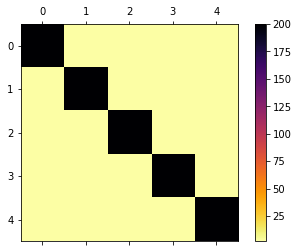

In [6]:
cax = plt.axes().matshow(propensity, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

Most of the action happens in the <code>gt.<b>generate_sbm</b>()</code> function. 

<div class="alert alert-warning">
    Let's see the signature of the <code>generate_sbm</code> method:
    
- graph_tool.generation.<b>generate_sbm</b>(b, probs, out_degs=None, in_degs=None, directed=False, micro_ers=False, micro_degs=False)

Let's focus on <code>b</code> and <code>probs</code>:

- <code>b</code> is the group membership of each node; it is an iterable containing the label of each node. 
- <code>probs</code> is the matrix of propensity between groups. <code>probs[r,s]</code> is the average number of edges between groups r and s. 
</div>

In [7]:
g = gt.generate_sbm(group_memberships, propensity)

In [8]:
adjacency = gt.adjacency(g)

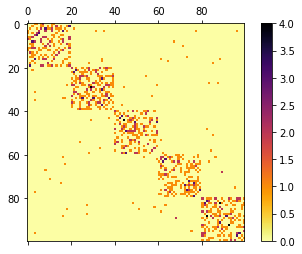

In [9]:
cax = plt.axes().matshow(adjacency.todense(), cmap=plt.cm.inferno_r)
plt.colorbar(cax);

We can remove self loops with the <code>gt.<b>remove_self_loops</b>(g)</code> function.

In [10]:
gt.remove_self_loops(g)

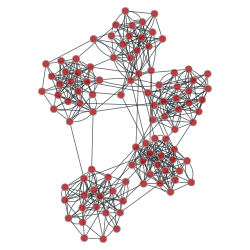

In [11]:
pos = gt.sfdp_layout(g)
gt.graph_draw(g, output_size=(250, 250));

In [12]:
def node_colors(g, group_memberships):
    # color of the nodes
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    to_rgb = lambda h: list(int(h[i:i+2], 16)/255. for i in (0, 2, 4))
    vertex_color = g.new_vertex_property('vector<double>')
    for m, v in zip(group_memberships, g.vertices()):
        vertex_color[g.vertex(v)] = tuple(to_rgb(colors[m][1:]) + [255.0])
    return vertex_color

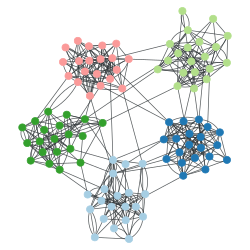

In [13]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(250, 250));

Let's create blocks of different size:

In [14]:
def generate_assortative_block_mix(group_sizes, p_ii, p_ij):
    groups = len(group_sizes)
    membership = np.concatenate([
        np.repeat(i, g) for (i, g) in zip(range(groups), group_sizes)
    ])
    propensity = np.zeros([groups, groups])
    for i in range(groups):
        for j in range(groups):
            if i == j:
                propensity[i, j] = p_ii * group_sizes[i] * group_sizes[j] 
            else:
                propensity[i, j] = p_ij * group_sizes[i] * group_sizes[j] / 2.    
    return membership, propensity

In [15]:
group_sizes = [50, 20, 10, 10, 10]
group_memberships, propensity = generate_assortative_block_mix(group_sizes, 0.5, 0.01)

In [16]:
propensity

array([[1.25e+03, 5.00e+00, 2.50e+00, 2.50e+00, 2.50e+00],
       [5.00e+00, 2.00e+02, 1.00e+00, 1.00e+00, 1.00e+00],
       [2.50e+00, 1.00e+00, 5.00e+01, 5.00e-01, 5.00e-01],
       [2.50e+00, 1.00e+00, 5.00e-01, 5.00e+01, 5.00e-01],
       [2.50e+00, 1.00e+00, 5.00e-01, 5.00e-01, 5.00e+01]])

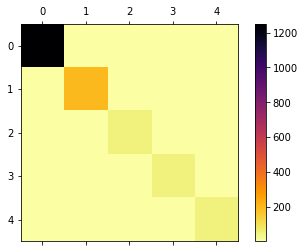

In [17]:
cax = plt.axes().matshow(propensity, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

Then we generate a network:

In [18]:
g = gt.generate_sbm(group_memberships, propensity)

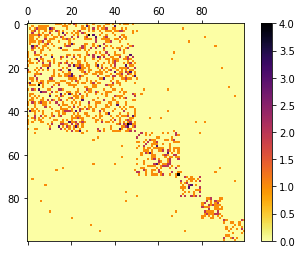

In [19]:
adjacency = gt.adjacency(g)
cax = plt.axes().matshow(adjacency.todense(), cmap=plt.cm.inferno_r)
plt.colorbar(cax);

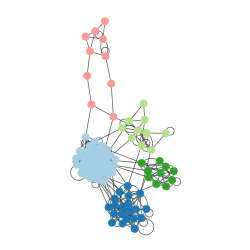

In [20]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(250, 250));

### Generating networks with disassortative mixing.

In [21]:
group_sizes = [50, 25, 25]
group_memberships, propensity = generate_assortative_block_mix(group_sizes, 0.01, 0.4)

In [22]:
propensity

array([[ 25.  , 250.  , 250.  ],
       [250.  ,   6.25, 125.  ],
       [250.  , 125.  ,   6.25]])

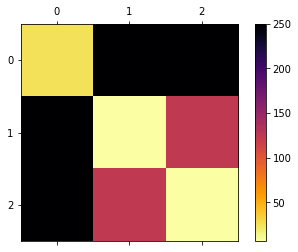

In [23]:
cax = plt.axes().matshow(propensity, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

In [24]:
g = gt.generate_sbm(group_memberships, propensity)

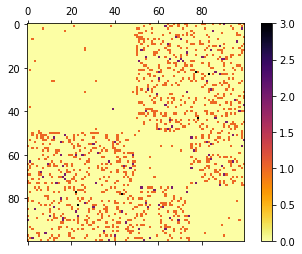

In [25]:
adjacency = gt.adjacency(g)
cax = plt.axes().matshow(adjacency.todense(), cmap=plt.cm.inferno_r)
plt.colorbar(cax);

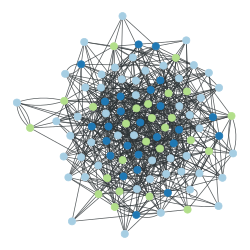

In [26]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(250, 250));

An extreme case of heterophily:

In [27]:
group_sizes = [50, 50]
group_memberships, propensity = generate_assortative_block_mix(group_sizes, 0.0, 0.25)
g = gt.generate_sbm(group_memberships, propensity)

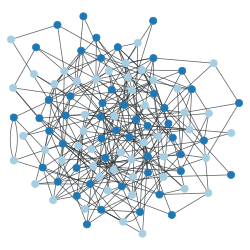

In [28]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(250, 250));

### Generating networks with core-periphery structure

In [29]:
probabilities = np.array([[.45, .15, .04],
                          [.15, .25, .05],
                          [.04, .05, .06]])

In [36]:
group_sizes = [25, 50, 75]
group_memberships, _ = generate_assortative_block_mix(group_sizes, 0.5, 0.01)

In [37]:
propensity = np.zeros_like(probabilities)
for i in range(len(group_sizes)):
    for j in range(len(group_sizes)):
        propensity[i][j] = probabilities[i][j]*group_sizes[i]*group_sizes[j]
        if i == j:
            propensity[i][j] /= 2.0

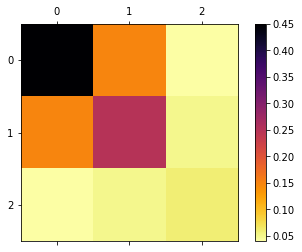

In [38]:
cax = plt.axes().matshow(probabilities, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

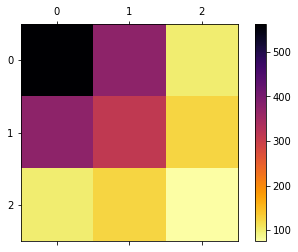

In [39]:
cax = plt.axes().matshow(propensity, cmap=plt.cm.inferno_r)
plt.colorbar(cax);

<div class="alert alert-info">
Did you notice that the two matrices above are different? Can you see why?
</div>

In [40]:
g = gt.generate_sbm(group_memberships, propensity)

Let's plot it:

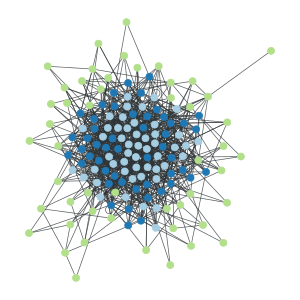

In [41]:
vertex_color = node_colors(g, group_memberships)
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=vertex_color, vertex_color=vertex_color, output_size=(300, 300));

<div class="alert alert-info">
What networks are like this?
</div>